In [19]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\athar\Documents\Coding\AI\Projects\Data\climate_change_impact_on_agriculture.csv')

# Display the first few rows
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [3]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [4]:
# Summary statistics
df.describe()

,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


In [5]:
# Check for missing values
df.isnull().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

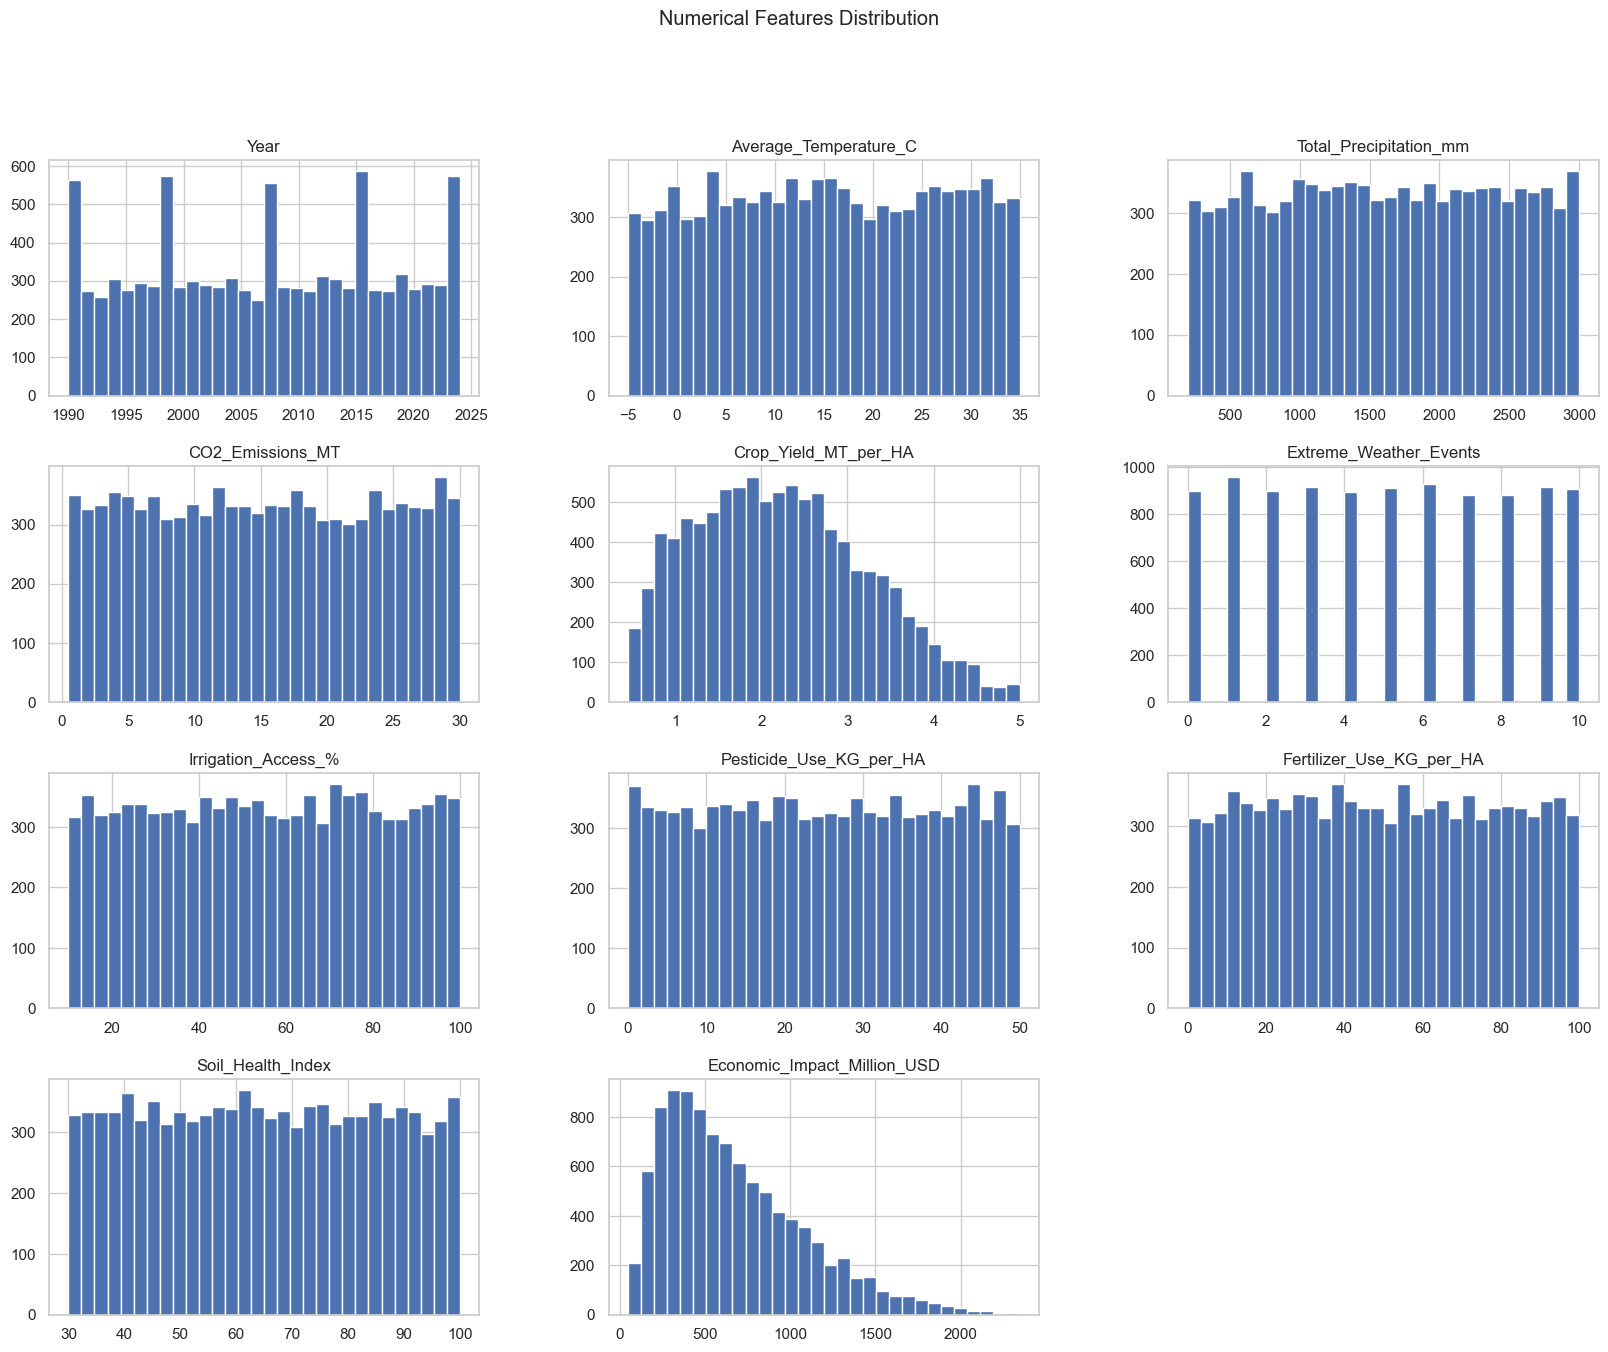

In [6]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions
df[numerical_cols].hist(bins=30, figsize=(20,15))
plt.suptitle('Numerical Features Distribution')
plt.show()

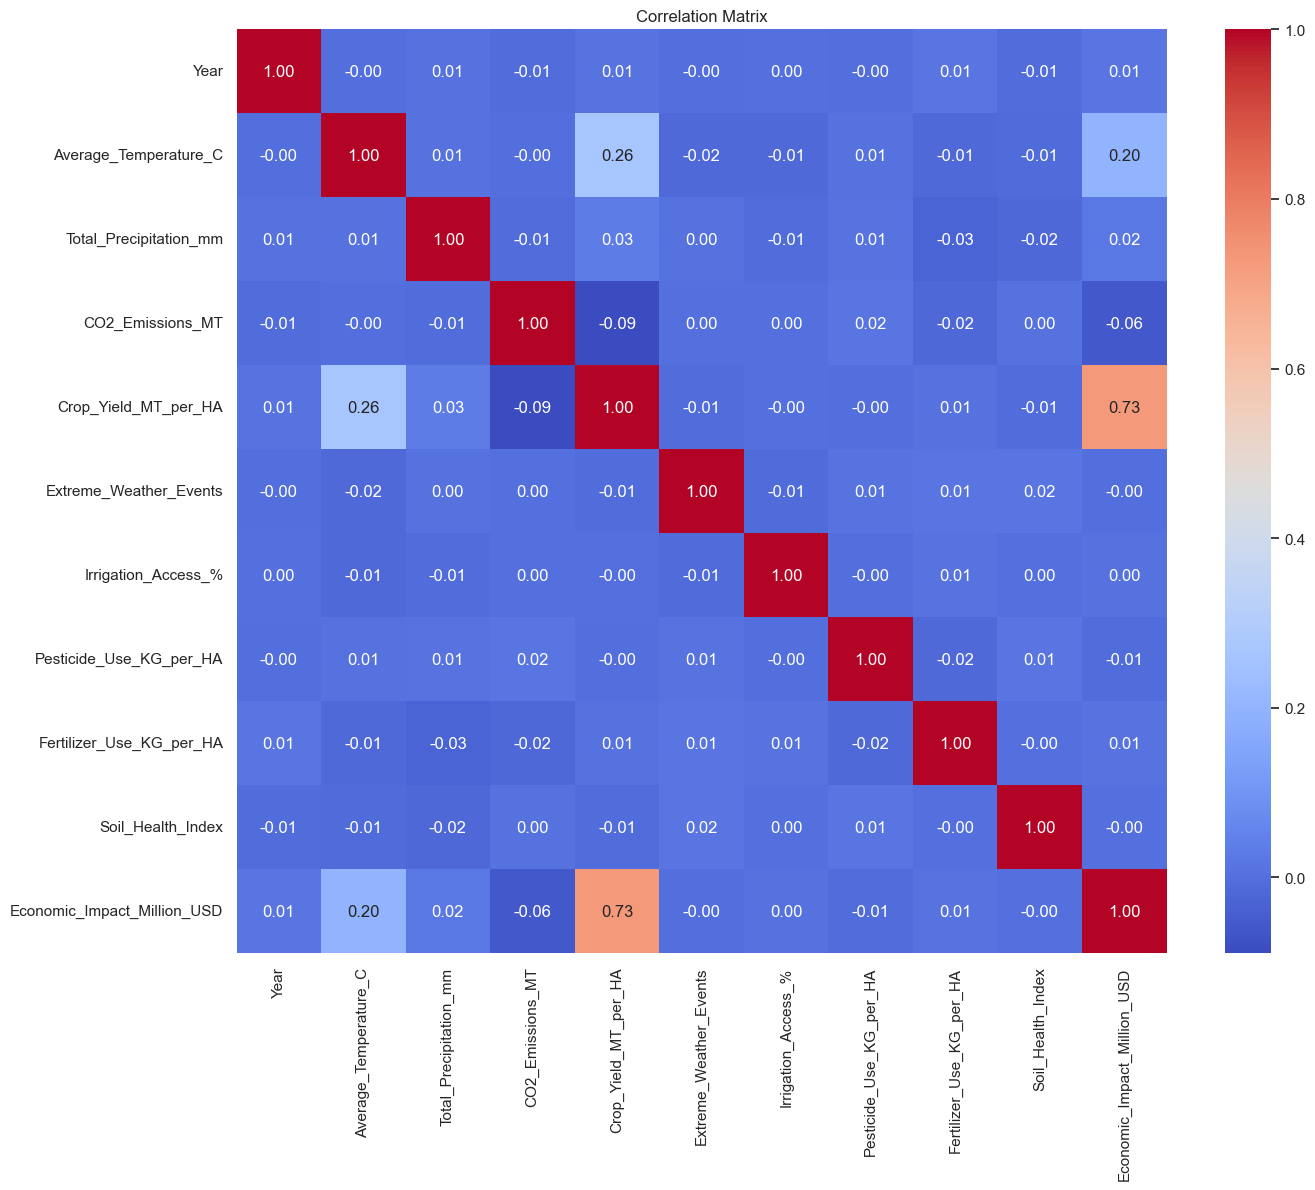

In [7]:
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

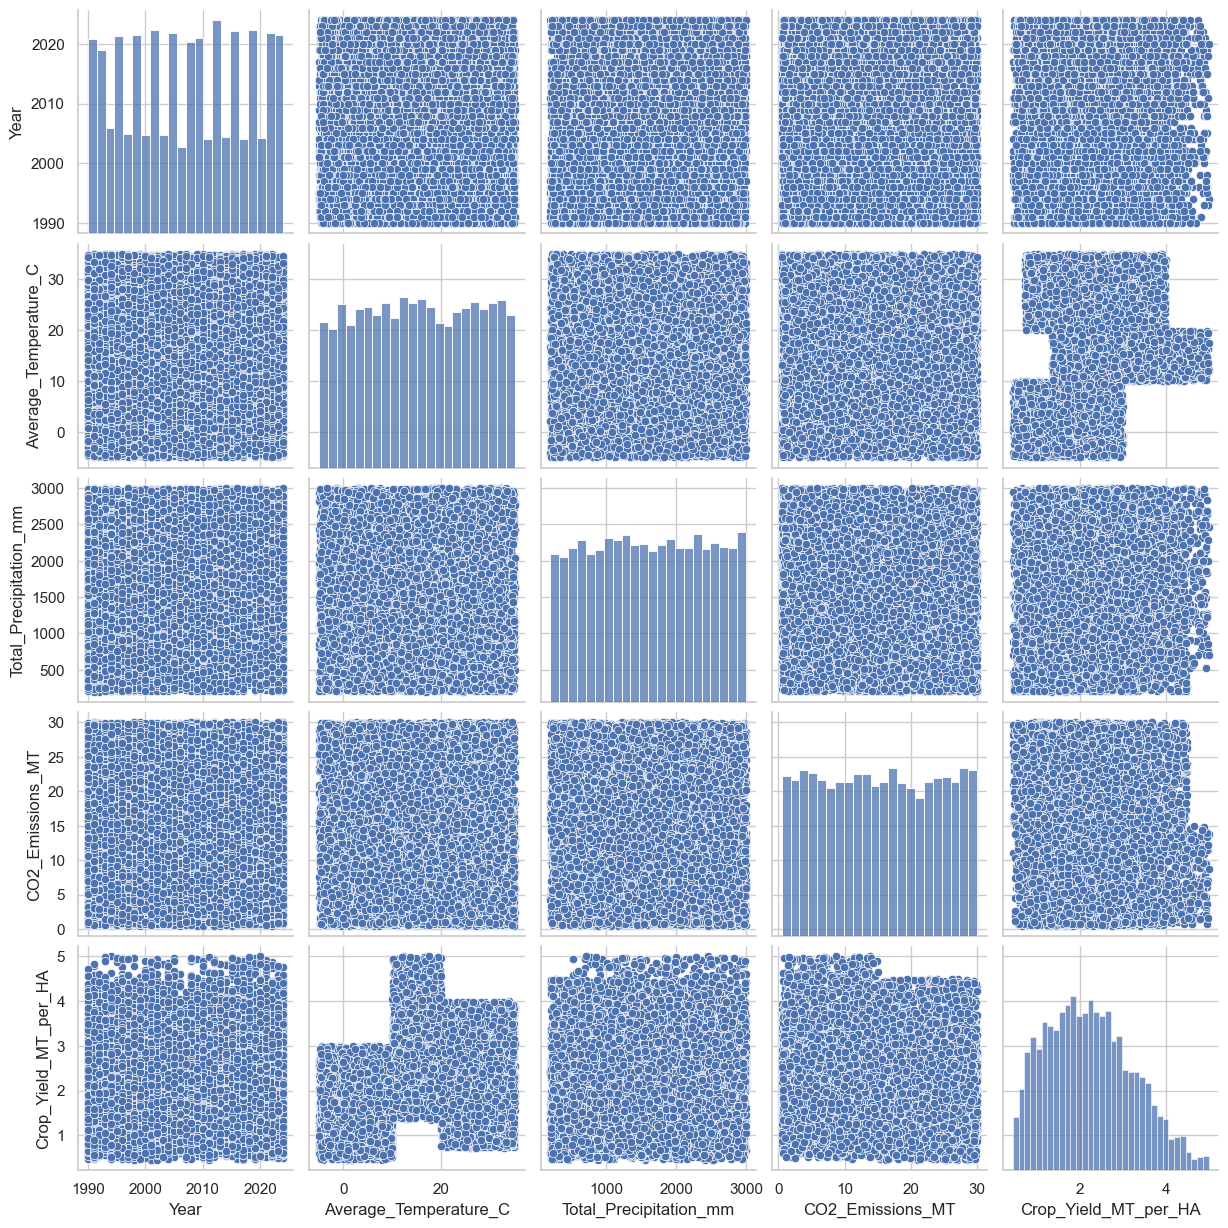

In [9]:
# Pairplot for selected features
selected_features = numerical_cols[:5]  # Adjust based on dataset
sns.pairplot(df[selected_features])
plt.show()

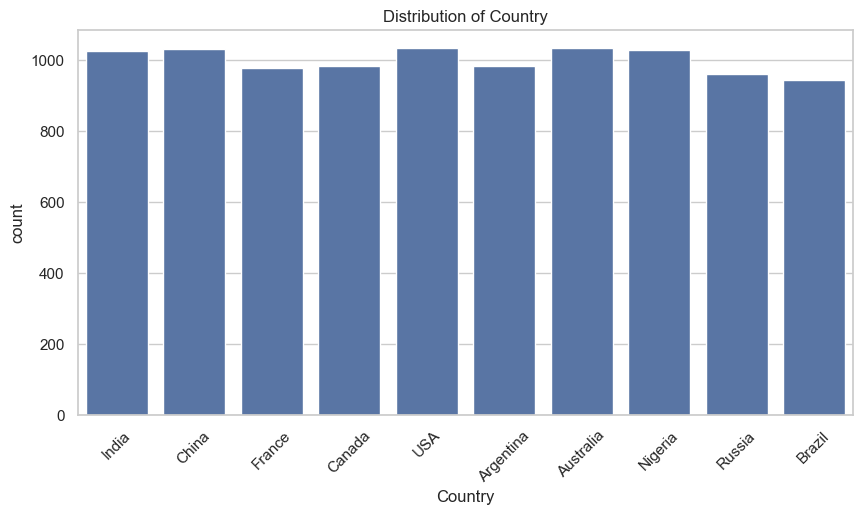

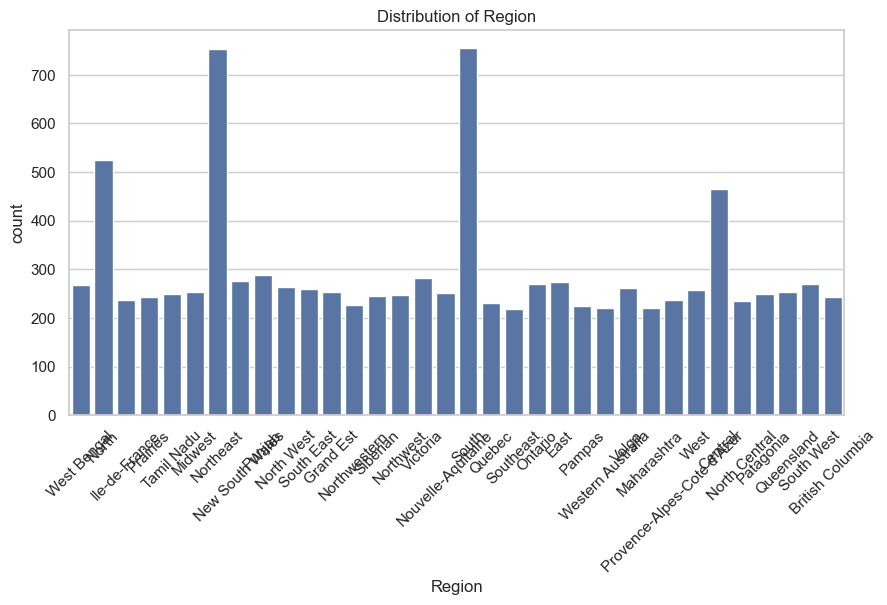

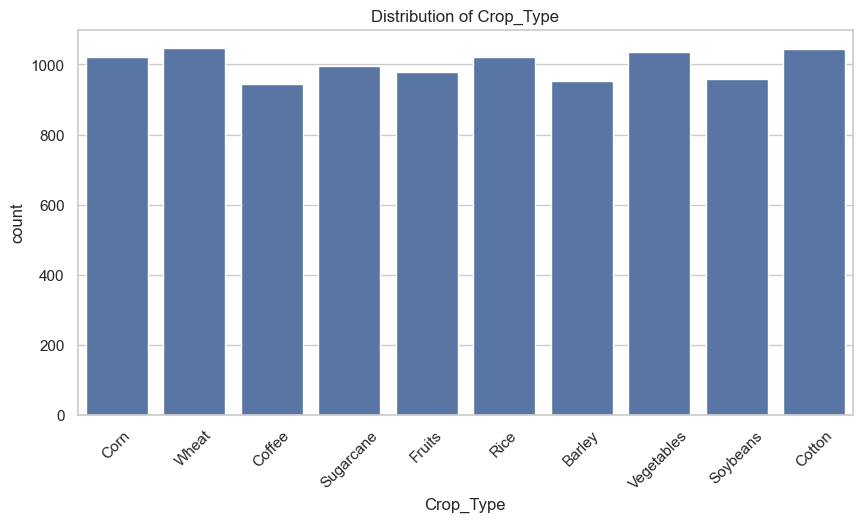

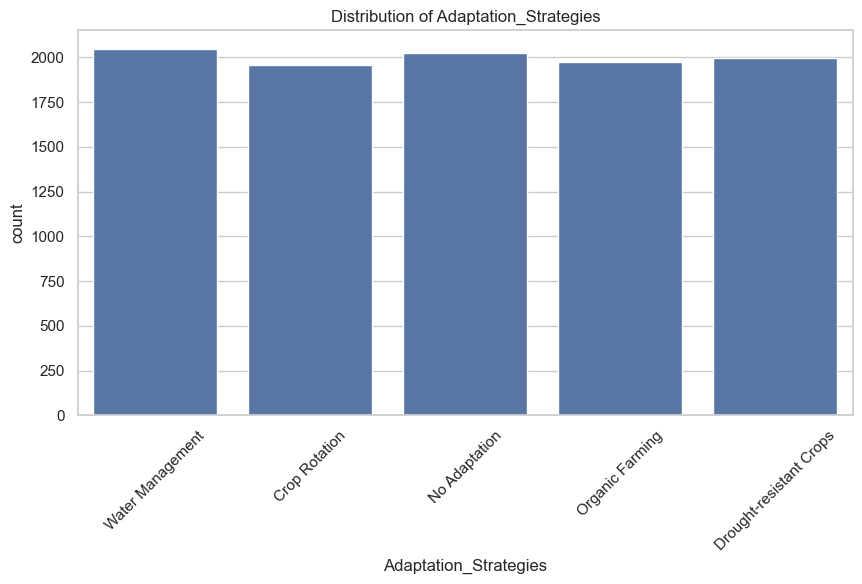

In [8]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
# Initialize Label Encoder
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [11]:
# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [12]:
# Define target variable
# Replace 'target_column' with the actual target column name from your dataset
target = 'Crop_Yield_MT_per_HA'

# Features and target
X = df.drop(columns=[target])
y = df[target]

In [13]:
# Split the data into training and testing sets
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Define a dictionary of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}

In [22]:
# Initialize a list to store model performance
performance = []

# Iterate through models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    # Append results as a dictionary to the performance list
    performance.append({
        'Model': name,
        'RMSE': RMSE,
        'MAE': MAE,
        'R2-Score': R2
    })

# Convert the performance list to a DataFrame
performance_df = pd.DataFrame(performance)

# Sort the DataFrame by Accuracy in descending order
performance_df = performance_df.sort_values(by='RMSE', ascending=True).reset_index(drop=True)

# Display the performance DataFrame
performance_df

,Model,RMSE,MAE,R2-Score
0,Gradient Boosting,0.618637,0.500618,0.638640
1,Random Forest,0.631177,0.509625,0.623842
2,XGBoost,0.672133,0.535124,0.573441
3,Linear Regression,0.679450,0.546068,0.564104


In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for RandomizedSearchCV
xgb_param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.19),  # 0.01 to 0.2
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 6),
    'subsample': uniform(0.6, 0.4),  # 0.6 to 1.0
    'colsample_bytree': uniform(0.6, 0.4),  # 0.6 to 1.0
    'gamma': uniform(0, 0.2),
    'reg_alpha': uniform(0, 0.1),
    'reg_lambda': uniform(1, 1)  # 1 to 2
}

# Initialize RandomizedSearchCV for XGBoost
xgb_random = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, objective='reg:squarederror'),
    param_distributions=xgb_param_dist,
    n_iter=50,  # Number of parameter settings sampled
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

# Fit the randomized search
xgb_random.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters for XGBoost: {xgb_random.best_params_}")

# Best estimator
best_xgb = xgb_random.best_estimator_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8363571772752967, 'gamma': 0.1355128723684565, 'learning_rate': 0.013151687496292669, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 247, 'reg_alpha': 0.064517279040945, 'reg_lambda': 1.1743664290049916, 'subsample': 0.8763750952409863}


In [27]:
# Predictions with the best estimator
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluation
print("Tuned XGBoost Performance:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_best_xgb)):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best_xgb):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_best_xgb):.2f}\n")

Tuned XGBoost Performance:
RMSE: 0.62
MAE: 0.50
R2 Score: 0.63



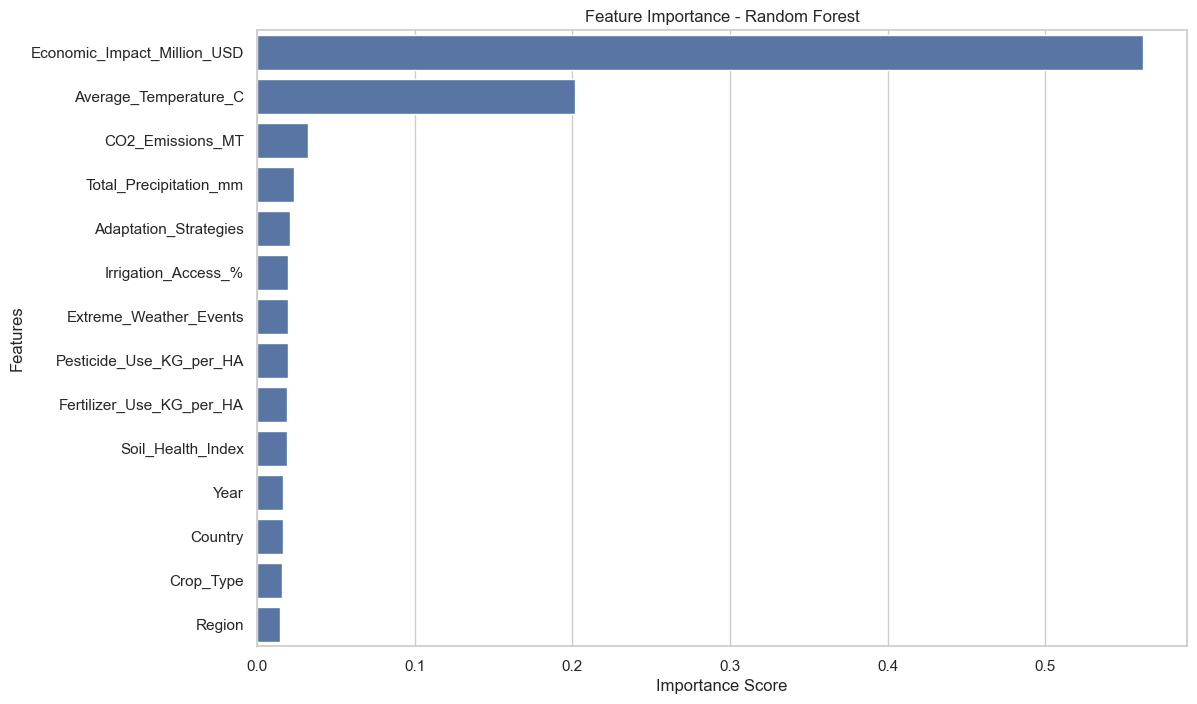

In [29]:
# Feature importance from Random Forest
importances = best_xgb.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()